<a href="https://colab.research.google.com/github/ggyupi/PCVK_Ganjil_2025/blob/main/PCVK_Jobsheet_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/dataset foto";

bagus_terang_path = drive_path + "/Rizqi Bagus A/terang/1.HEIC";
bagus_gelap_path = drive_path + "/Rizqi Bagus A/gelap/1.HEIC";
bagus_bayangan_path = drive_path + "/Rizqi Bagus A/bayangan/1.HEIC";

agung_terang_path = drive_path + "/Agung Fradiansyah/terang/1.HEIC"
agung_gelap_path = drive_path + "/Agung Fradiansyah/gelap/1.HEIC"
agung_bayangan_path = drive_path + "/Agung Fradiansyah/bayangan/1.HEIC";
# MANA FOTO BAYANGANMU GUNG?
agung_bayangan_path = drive_path + "/Agung Fradiansyah/bayangan/1.HEIC"

beryl_terang_path = drive_path + "/Beryl Funky Mubarok/terang/1.HEIC"
beryl_gelap_path = drive_path + "/Beryl Funky Mubarok/gelap/1.HEIC"
beryl_bayangan_path = drive_path + "/Beryl Funky Mubarok/bayangan/1.HEIC"



Mounted at /content/drive


# Bagian A

## 1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya.

In [3]:
!pip install pillow-heif

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
import pillow_heif

def read_heic_to_cv2(path):
    """Membaca file HEIC dan mengonversinya menjadi format BGR yang bisa dibaca OpenCV."""
    # Cv Dulu Heicnya
    heif_file = pillow_heif.read_heif(path)
    image = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
    )
    # Convert dari RGB (Pillow) ke BGR (OpenCV)
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)



# Membaca 3 citra wajah menggunakan fungsi yang baru dibuat
img_terang = read_heic_to_cv2(bagus_terang_path)
img_gelap = read_heic_to_cv2(bagus_gelap_path)
img_bayangan = read_heic_to_cv2(bagus_bayangan_path)

# Mengubah semua citra ke grayscale untuk analisis
gray_terang = cv2.cvtColor(img_terang, cv2.COLOR_BGR2GRAY)
gray_gelap = cv2.cvtColor(img_gelap, cv2.COLOR_BGR2GRAY)
gray_bayangan = cv2.cvtColor(img_bayangan, cv2.COLOR_BGR2GRAY)

print("Setup selesai! Tiga citra (terang, gelap, berbayang) berhasil dibaca.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.1 MB/s eta 0:00:00
Setup selesai! Tiga citra (terang, gelap, berbayang) berhasil dibaca.


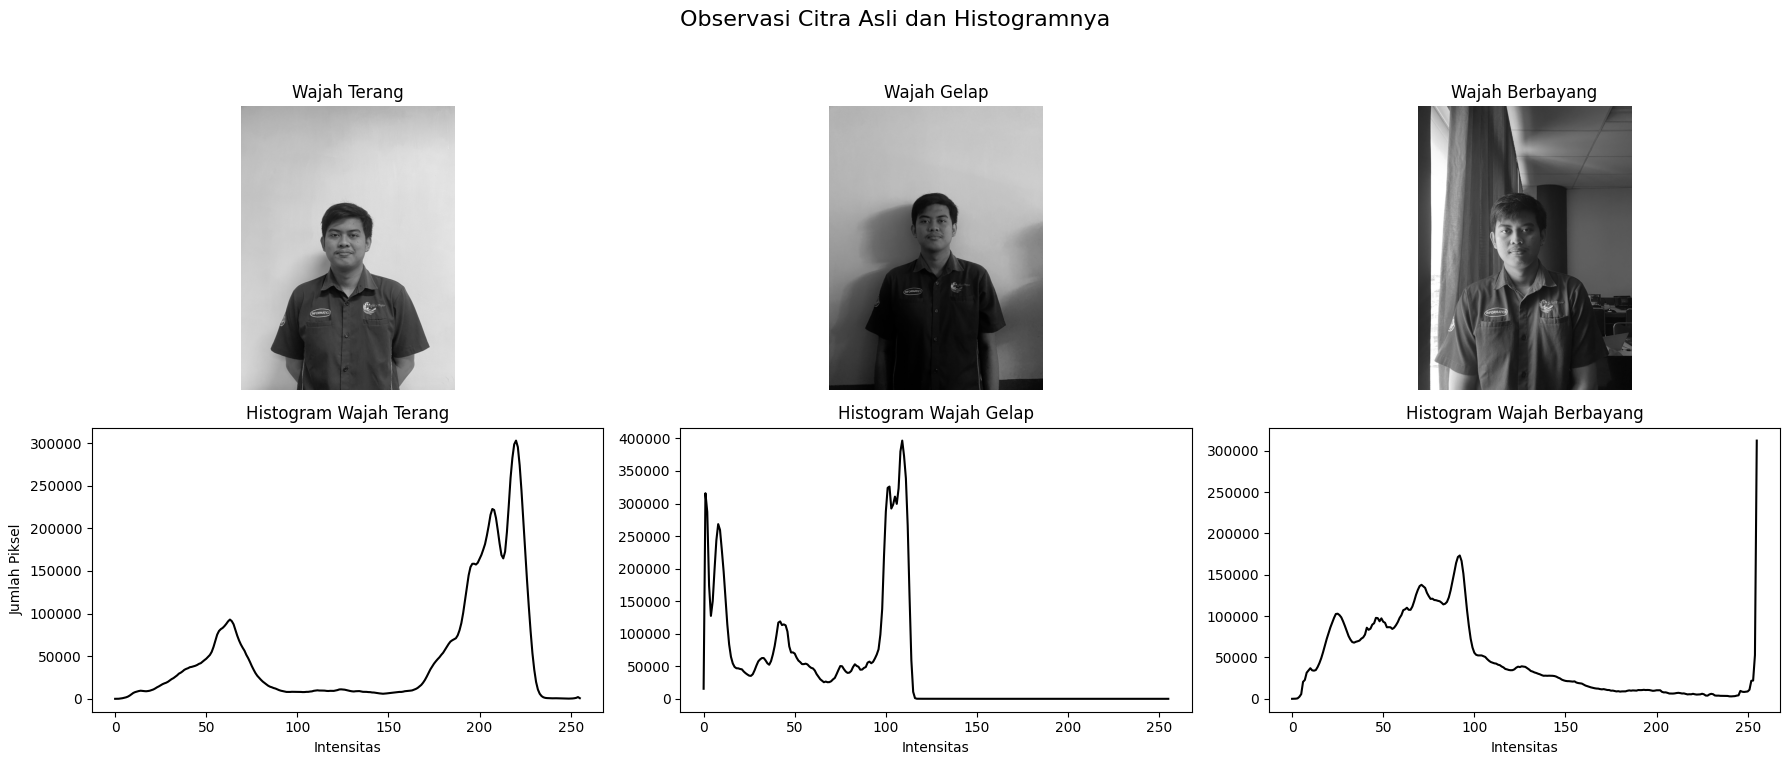

In [4]:
# Menghitung histogram untuk setiap citra
hist_terang = cv2.calcHist([gray_terang], [0], None, [256], [0, 256])
hist_gelap = cv2.calcHist([gray_gelap], [0], None, [256], [0, 256])
hist_bayangan = cv2.calcHist([gray_bayangan], [0], None, [256], [0, 256])

# Menyiapkan plot
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle('Observasi Citra Asli dan Histogramnya', fontsize=16)

# Citra Terang
axes[0, 0].imshow(gray_terang, cmap='gray')
axes[0, 0].set_title('Wajah Terang')
axes[0, 0].axis('off')
axes[1, 0].plot(hist_terang, color='black')
axes[1, 0].set_title('Histogram Wajah Terang')
axes[1, 0].set_xlabel('Intensitas')
axes[1, 0].set_ylabel('Jumlah Piksel')

# Citra Gelap
axes[0, 1].imshow(gray_gelap, cmap='gray')
axes[0, 1].set_title('Wajah Gelap')
axes[0, 1].axis('off')
axes[1, 1].plot(hist_gelap, color='black')
axes[1, 1].set_title('Histogram Wajah Gelap')
axes[1, 1].set_xlabel('Intensitas')

# Citra Berbayang
axes[0, 2].imshow(gray_bayangan, cmap='gray')
axes[0, 2].set_title('Wajah Berbayang')
axes[0, 2].axis('off')
axes[1, 2].plot(hist_bayangan, color='black')
axes[1, 2].set_title('Histogram Wajah Berbayang')
axes[1, 2].set_xlabel('Intensitas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2. Terapkan transformasi brightness dan contrast (linear/log brightness).
- Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar wajah tampak
natural.

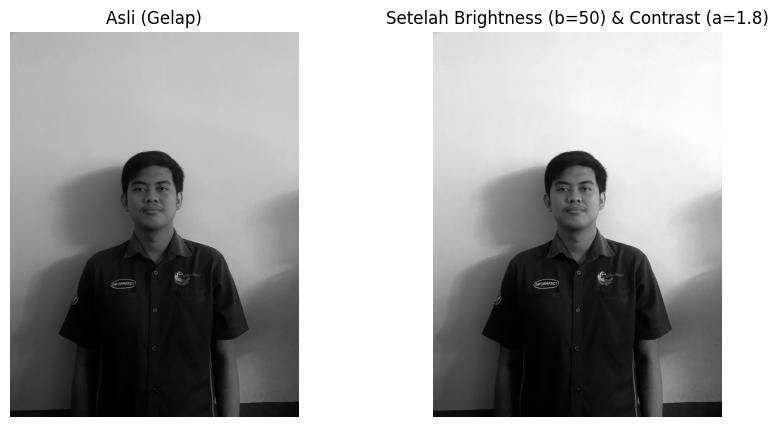

In [5]:
# Tentukan nilai a (kontras) dan b (kecerahan)
# Nilai ini adalah hasil eksperimen agar terlihat natural
a = 1.8  # Kontras (lebih dari 1 untuk meningkatkan)
b = 50   # Kecerahan (nilai positif untuk mencerahkan)

# Terapkan transformasi
img_bc = cv2.convertScaleAbs(gray_gelap, alpha=a, beta=b)

# Tampilkan perbandingan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_gelap, cmap='gray')
plt.title('Asli (Gelap)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_bc, cmap='gray')
plt.title(f'Setelah Brightness (b={b}) & Contrast (a={a})')
plt.axis('off')
plt.show()

## 3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.
- Bandingkan hasil visual dan histogram sebelum–sesudah.


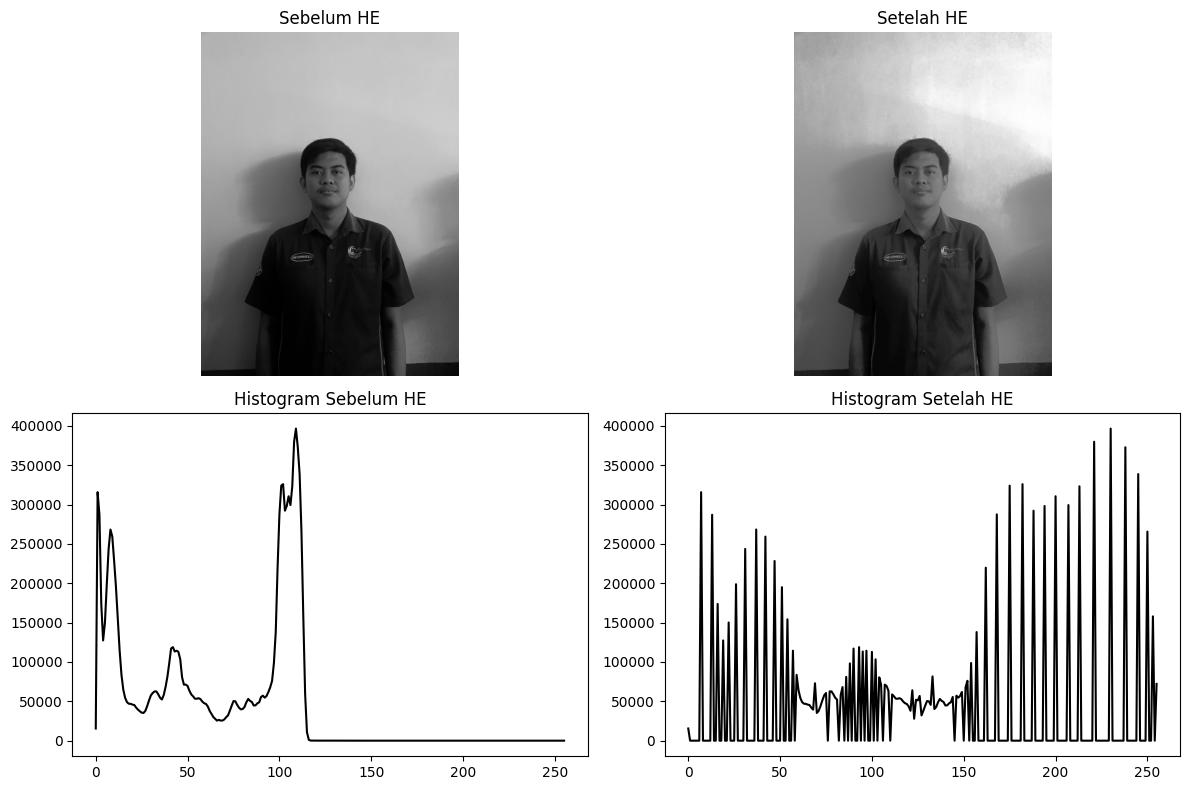

In [6]:
# Terapkan HE
img_he = cv2.equalizeHist(gray_gelap)

# Hitung histogram sebelum dan sesudah HE
hist_bc = cv2.calcHist([gray_gelap], [0], None, [256], [0, 256])
hist_he = cv2.calcHist([img_he], [0], None, [256], [0, 256])

# Tampilkan perbandingan visual dan histogram [cite: 27]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(gray_gelap, cmap='gray')
axes[0, 0].set_title('Sebelum HE')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_he, cmap='gray')
axes[0, 1].set_title('Setelah HE')
axes[0, 1].axis('off')

axes[1, 0].plot(hist_bc, color='black')
axes[1, 0].set_title('Histogram Sebelum HE')

axes[1, 1].plot(hist_he, color='black')
axes[1, 1].set_title('Histogram Setelah HE')

plt.tight_layout()
plt.show()

## 4. Terapkan filter spasial:
- Low-pass filter untuk menghaluskan noise kulit wajah.
- High-pass atau Laplacian filter untuk menajamkan tepi mata dan bibir.

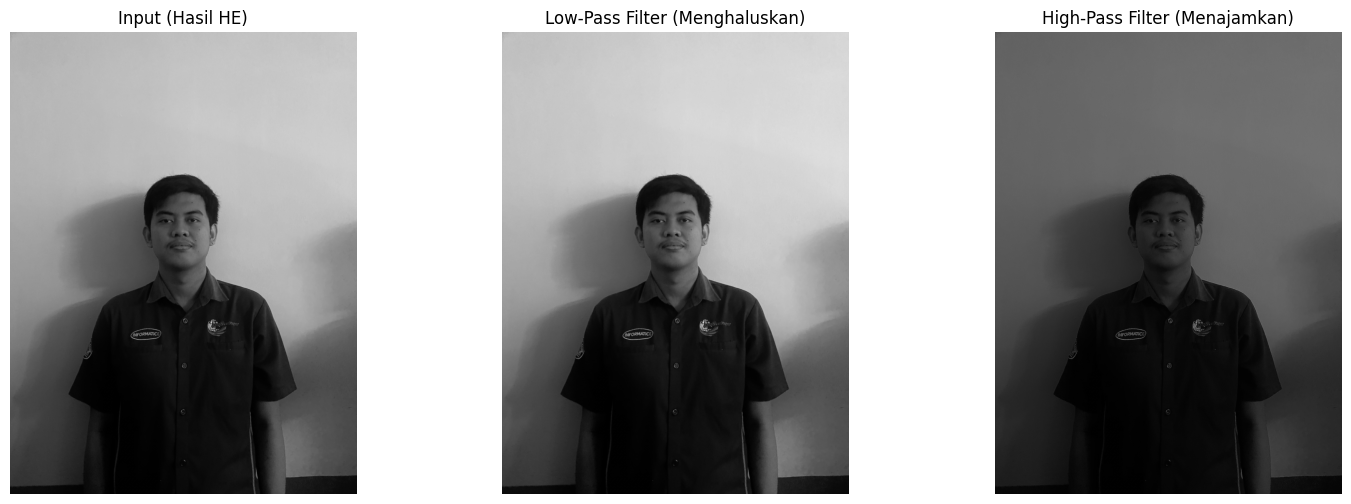

In [7]:
# Low-pass filter untuk menghaluskan noise kulit wajah [cite: 30]
# Kita gunakan GaussianBlur yang lebih halus daripada blur biasa
img_lowpass = cv2.GaussianBlur(gray_gelap, (5, 5), 0)

# High-pass (Laplacian) filter untuk menajamkan tepi [cite: 32]
# Kernel ini menajamkan gambar
kernel_sharpen = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])
img_highpass = cv2.filter2D(gray_gelap, -1, kernel_sharpen)

# Tampilkan perbandingan
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_gelap, cmap='gray')
plt.title('Input (Hasil HE)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_lowpass, cmap='gray')
plt.title('Low-Pass Filter (Menghaluskan)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_highpass, cmap='gray')
plt.title('High-Pass Filter (Menajamkan)')
plt.axis('off')
plt.show()

## 5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warnawajah (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap detail dan ekspresi wajah.


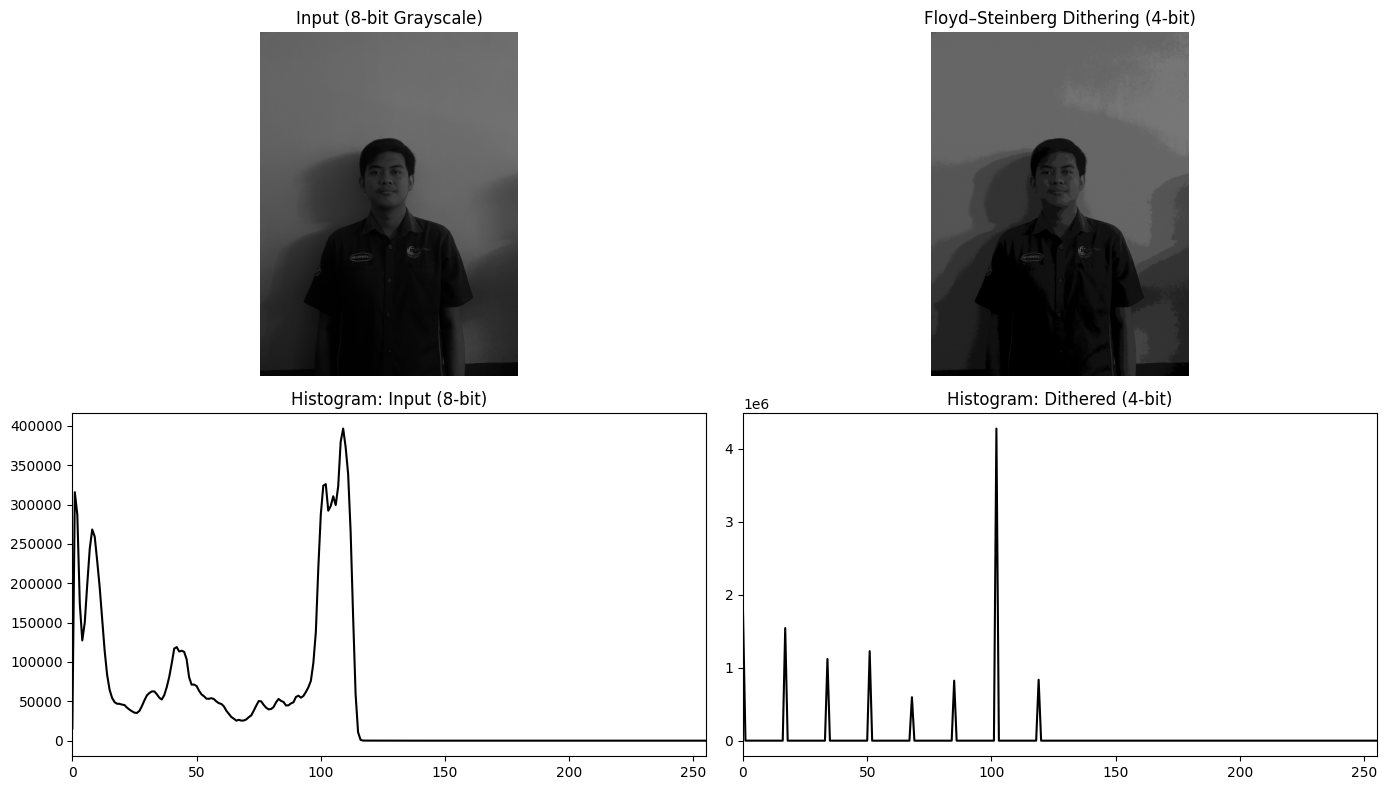

In [8]:
def get_new_val(old_val, nc):
    return np.round(old_val * (nc - 1)) / (nc - 1)

def fs_dither_cv2_fast(img, nc=16):
    """
    Floyd–Steinberg dithering versi cepat (NumPy vectorized).
    """
    arr = img.astype(np.float32) / 255.0

    # Pastikan array memiliki channel (H, W, C)
    if len(arr.shape) == 2:
        arr = np.expand_dims(arr, axis=2)

    h, w, c = arr.shape

    for y in range(h - 1):  # cukup sampai h-2
        # Kuantisasi satu baris sekaligus
        old_row = arr[y, :, :]
        new_row = get_new_val(old_row, nc)
        arr[y, :, :] = new_row
        err_row = old_row - new_row

        # Sebarkan error dengan slicing NumPy
        arr[y, 1:, :] += err_row[:-1, :] * 7 / 16
        arr[y + 1, :-1, :] += err_row[1:, :] * 3 / 16
        arr[y + 1, :, :] += err_row * 5 / 16
        arr[y + 1, 1:, :] += err_row[:-1, :] * 1 / 16

    arr = np.clip(arr, 0, 1)
    result = (arr * 255).astype(np.uint8)

    if result.shape[2] == 1:
        result = result[:, :, 0]
    return result


img_dithered = fs_dither_cv2_fast(gray_gelap, nc=16)

hist_ori = cv2.calcHist([gray_gelap], [0], None, [256], [0, 256]).ravel()
hist_dth = cv2.calcHist([img_dithered],   [0], None, [256], [0, 256]).ravel()

# Plot gambar dan histogram
plt.figure(figsize=(14, 8))

# Baris 1: Gambar asli dan hasil dithering
plt.subplot(2, 2, 1)
plt.imshow(gray_gelap, cmap='gray', vmin=0, vmax=255)
plt.title('Input (8-bit Grayscale)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_dithered, cmap='gray', vmin=0, vmax=255)
plt.title('Floyd–Steinberg Dithering (4-bit)')
plt.axis('off')

# Baris 2: Histogram (kurva)
plt.subplot(2, 2, 3)
plt.plot(hist_ori, color='black')
plt.title('Histogram: Input (8-bit)')
plt.xlim(0, 255)

plt.subplot(2, 2, 4)
plt.plot(hist_dth, color='black')
plt.title('Histogram: Dithered (4-bit)')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

# Bagian B


## Bagaimana perubahan nilai brightness dan contrast memengaruhi hasil histogram wajah gelap?

Berdasarkan hasil pengamatan pada gambar sebelum dan sesudah dilakukan proses **Histogram Equalization (HE)**, terlihat adanya perubahan yang signifikan pada tingkat kecerahan (**brightness**) dan kontras (**contrast**) citra, khususnya pada bagian wajah yang semula tampak gelap. Sebelum dilakukan HE, distribusi intensitas piksel pada histogram terkonsentrasi di sisi kiri, menandakan bahwa sebagian besar nilai piksel berada pada rentang keabuan rendah. Kondisi ini menunjukkan bahwa citra memiliki tingkat kecerahan yang rendah, sehingga wajah tampak redup dan detail-detail pada area gelap sulit dibedakan dengan jelas. Selain itu, rentang distribusi nilai intensitas yang sempit menggambarkan bahwa kontras citra juga rendah, membuat perbedaan antara area terang dan gelap tidak terlalu terlihat.

Setelah dilakukan proses HE, terjadi perubahan yang mencolok pada bentuk histogram. Nilai intensitas piksel menjadi lebih tersebar merata di seluruh rentang 0 hingga 255, menandakan peningkatan kecerahan dan kontras secara keseluruhan. Piksel-piksel pada area gelap mengalami peningkatan nilai intensitas, sehingga wajah yang sebelumnya tampak gelap menjadi lebih terang dan detailnya terlihat lebih jelas. Di sisi lain, area terang tetap terjaga tanpa kehilangan informasi penting. Dengan demikian, proses HE berhasil memperluas rentang dinamis citra, meningkatkan perbedaan antara area terang dan gelap, serta menghasilkan tampilan wajah yang lebih seimbang dan jelas dibandingkan dengan sebelum dilakukan perbaikan.


## Apakah histogram equalization selalu memperbaiki detail wajah? Jelaskan alasannya dengan contoh hasil Anda.

Berdasarkan gambar hasil sebelum dan sesudah dilakukan **Histogram Equalization (HE)**, dapat disimpulkan bahwa **histogram equalization tidak selalu mampu memperbaiki detail wajah secara sempurna**. Proses HE memang bertujuan untuk meningkatkan kontras citra dengan cara menyebarkan nilai intensitas piksel agar mencakup rentang keabuan yang lebih luas. Hal ini terlihat pada histogram hasil, di mana distribusi piksel setelah HE menjadi lebih merata di seluruh rentang 0–255, berbeda dengan sebelum HE yang cenderung menumpuk di area gelap.

Namun, meskipun kontras secara umum meningkat dan wajah yang semula tampak gelap menjadi lebih terang, peningkatan ini tidak selalu menghasilkan detail yang lebih jelas. Pada contoh hasil di atas, sebagian area wajah memang menjadi lebih mudah terlihat, tetapi beberapa bagian lain justru tampak terlalu terang atau kehilangan gradasi halus akibat penyebaran intensitas yang ekstrem. Dengan kata lain, proses HE dapat menimbulkan efek **over-enhancement**, di mana perbedaan intensitas terlalu diperkuat sehingga detail halus pada permukaan kulit atau bayangan wajah justru hilang.

Oleh karena itu, HE efektif untuk meningkatkan visibilitas secara global, terutama pada citra dengan pencahayaan rendah, tetapi tidak selalu optimal untuk memperbaiki **detail lokal** seperti tekstur atau kontur wajah. Dalam kasus seperti ini, metode lain seperti **Contrast Limited Adaptive Histogram Equalization (CLAHE)** biasanya lebih sesuai, karena dapat menyesuaikan peningkatan kontras pada area tertentu tanpa merusak keseluruhan tampilan citra.


## 3. Bandingkan hasil low-pass dan high-pass filter pada area wajah — bagian mana yang paling terpengaruh?

Perbandingan pada area wajah:

Low-Pass Filter paling memengaruhi tekstur permukaan kulit, membuatnya terlihat lebih mulus dan mengurangi detail halus.

* Hasil pada wajah: Wajah terlihat lebih halus, tekstur kulit (termasuk noise) berkurang, dan detail-detail kecil seperti pori-pori atau kerutan halus menjadi kabur. Efeknya paling terlihat pada tekstur permukaan (kulit).

High-Pass Filter paling memengaruhi tepi dan kontur wajah, membuatnya terlihat lebih tajam dan menonjolkan garis batas struktural.

* Hasil pada wajah: Tepi-tepi kontras (seperti batas antara wajah dan rambut, garis hidung, mata, dan mulut) menjadi lebih jelas dan menonjol. Efeknya paling terlihat pada tepi dan detail struktural.

## 4. Mengapa proses dithering bisa mempertegas atau justru mengaburkan ekspresi wajah?

Bagaimana Dithering Mempertegas Ekspresi Wajah,
Dithering dapat mempertegas ekspresi wajah karena dua alasan utama:

1.   Penekanan Kontras Lokal (Simulasi Detail): Metode Floyd-Steinberg mendistribusikan kesalahan kuantisasi (quantization error) ke piksel-piksel tetangga. Distribusi kesalahan ini secara efektif menciptakan kontras lokal yang lebih tajam antara area terang dan gelap, bahkan dengan palet warna yang terbatas. Dalam konteks wajah, hal ini dapat:

* Menekankan Garis Ekspresi: Bayangan di sekitar mata, garis senyum, atau kerutan yang menentukan ekspresi, seringkali menjadi lebih jelas atau "keras" karena gradasi warna yang mulus digantikan oleh pola titik kontras tinggi.

* Menajamkan Batas Fitur: Tepi fitur wajah seperti alis, bibir, dan sudut mata menjadi lebih tegas karena pengurangan tingkat keabuan.

2.   Menghilangkan Noise Gradasi: Dengan membatasi jumlah level keabuan, dithering menghilangkan banding (pita-pita warna) yang mungkin muncul pada gradien halus. Dithering menggantikan banding dengan pola titik halus, membuat transisi terlihat lebih hidup, yang secara tidak langsung dapat mempertahankan atau memperjelas detail ekspresif yang sebelumnya mungkin terlihat "pudar" dalam gradien halus.

Bagaimana Dithering Mengaburkan Ekspresi Wajah,
Sebaliknya, dithering dapat mengaburkan atau mengganggu ekspresi wajah karena:

1. Kehilangan Gradasi Halus yang Penting: Ekspresi wajah sangat bergantung pada gradien keabuan yang halus untuk memberikan kedalaman, bentuk, dan emosi (misalnya, transisi lembut bayangan di pipi atau di bawah hidung).

* Ketika tingkat keabuan dikurangi drastis (dari 256 ke 16), detail-detail halus ini hilang. Dithering berusaha menutupi kehilangan ini, tetapi pola titik yang dihasilkan mungkin tidak secara akurat mereplikasi kelembutan asli, sehingga membuat wajah terlihat datar atau bertekstur kasar.

2. Pengenalan Noise Visual (Pola Titik): Dithering mengenalkan pola titik yang disebut dithering pattern. Pola ini, meskipun bertujuan untuk mensimulasikan warna, secara visual dapat mengganggu persepsi kita terhadap bentuk dan tekstur.

* Jika pola titiknya terlalu menonjol, ia akan bersaing dengan detail asli wajah, menyebabkan mata kita fokus pada noise tersebut daripada pada ekspresi yang dimaksud. Hal ini sering membuat tekstur kulit terlihat kasar dan "berbintik", bukannya halus.

3. Ketergantungan pada Gambar Sumber: Karena Anda menerapkan dithering setelah High-Pass Filter (yang sudah menajamkan tepi), gambar sumber (img_highpass) sudah memiliki kontras yang sangat tinggi. Menerapkan dithering pada gambar yang sudah tajam dapat memperburuk efek bintik-bintik dan membuat gambar terlihat terlalu keras, mengalihkan fokus dari ekspresi emosional.

##  5. Berdasarkan hasil percobaan Anda, kombinasi teknik mana yang paling efektif untuk meningkatkan readability fitur wajah sebelum tahap deteksi?

1.	Brightness & Contrast (B&C) (α=1.8,β=50)

Tujuannya adalah Koreksi pencahayaan awal. Memindahkan rentang piksel gelap ke rentang yang lebih terang.

Ini adalah langkah fundamental untuk citra gelap. Detektor wajah modern bekerja paling baik pada citra dengan rentang intensitas yang optimal. B&C mencegah piksel di wajah menjadi terlalu gelap (hitam), yang akan menyulitkan semua proses selanjutnya.

2.	Histogram Equalization (HE)

Tujuannya adalh Penyebaran Kontras Global. Memaksimalkan perbedaan intensitas di seluruh citra.

HE memastikan bahwa fitur-fitur wajah yang tadinya "terjepit" dalam rentang intensitas yang sempit (misalnya, di area gelap) tersebar ke seluruh rentang 0−255. Ini meningkatkan kontras antar fitur (seperti antara mata dan pipi), yang sangat penting untuk deteksi.

3.	High-Pass Filter (Sharpening)

Tujuannya adalah Penekanan Tepi dan Detail. Menajamkan kontur dan batas fitur-fitur kunci.

Detektor wajah (terutama berbasis fitur seperti Haar Cascades atau HOG) sangat bergantung pada tepi (edges). Sharpening secara langsung meningkatkan respons tepi, membuat batas-batas fitur kritis seperti mata, hidung, dan garis rahang lebih jelas dan menonjol untuk diidentifikasi oleh algoritma deteksi.

**Kesimpulan**

Jadi Efektivitas dalam peningkatan readability fitur wajah sebelum deteksi adalah memaksimalkan dua hal: Kecerahan yang Cukup dan Tepi yang Tajam.

Kombinasi B&C -> HE memberikan koreksi pencahayaan dan kontras global yang optimal, sementara High-Pass Filter memberikan penekanan lokal pada informasi yang paling dicari oleh detektor: tepi yang terdefinisi dengan baik.

# Bagian C

In [9]:
!pip install pillow-heif

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
import pillow_heif

def read_heic_to_cv2(path):
    """Membaca file HEIC dan mengonversinya menjadi format BGR yang bisa dibaca OpenCV."""
    # Cv Dulu Heicnya
    heif_file = pillow_heif.read_heif(path)
    image = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
    )
    # Convert dari RGB (Pillow) ke BGR (OpenCV)
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)



# Membaca 3 citra wajah menggunakan fungsi yang baru dibuat
img_terang = read_heic_to_cv2(bagus_terang_path)
img_gelap = read_heic_to_cv2(bagus_gelap_path)
img_bayangan = read_heic_to_cv2(bagus_bayangan_path)

# Mengubah semua citra ke grayscale untuk analisis
gray_terang = cv2.cvtColor(img_terang, cv2.COLOR_BGR2GRAY)
gray_gelap = cv2.cvtColor(img_gelap, cv2.COLOR_BGR2GRAY)
gray_bayangan = cv2.cvtColor(img_bayangan, cv2.COLOR_BGR2GRAY)

print("Setup selesai! Tiga citra (terang, gelap, berbayang) berhasil dibaca.")


Setup selesai! Tiga citra (terang, gelap, berbayang) berhasil dibaca.


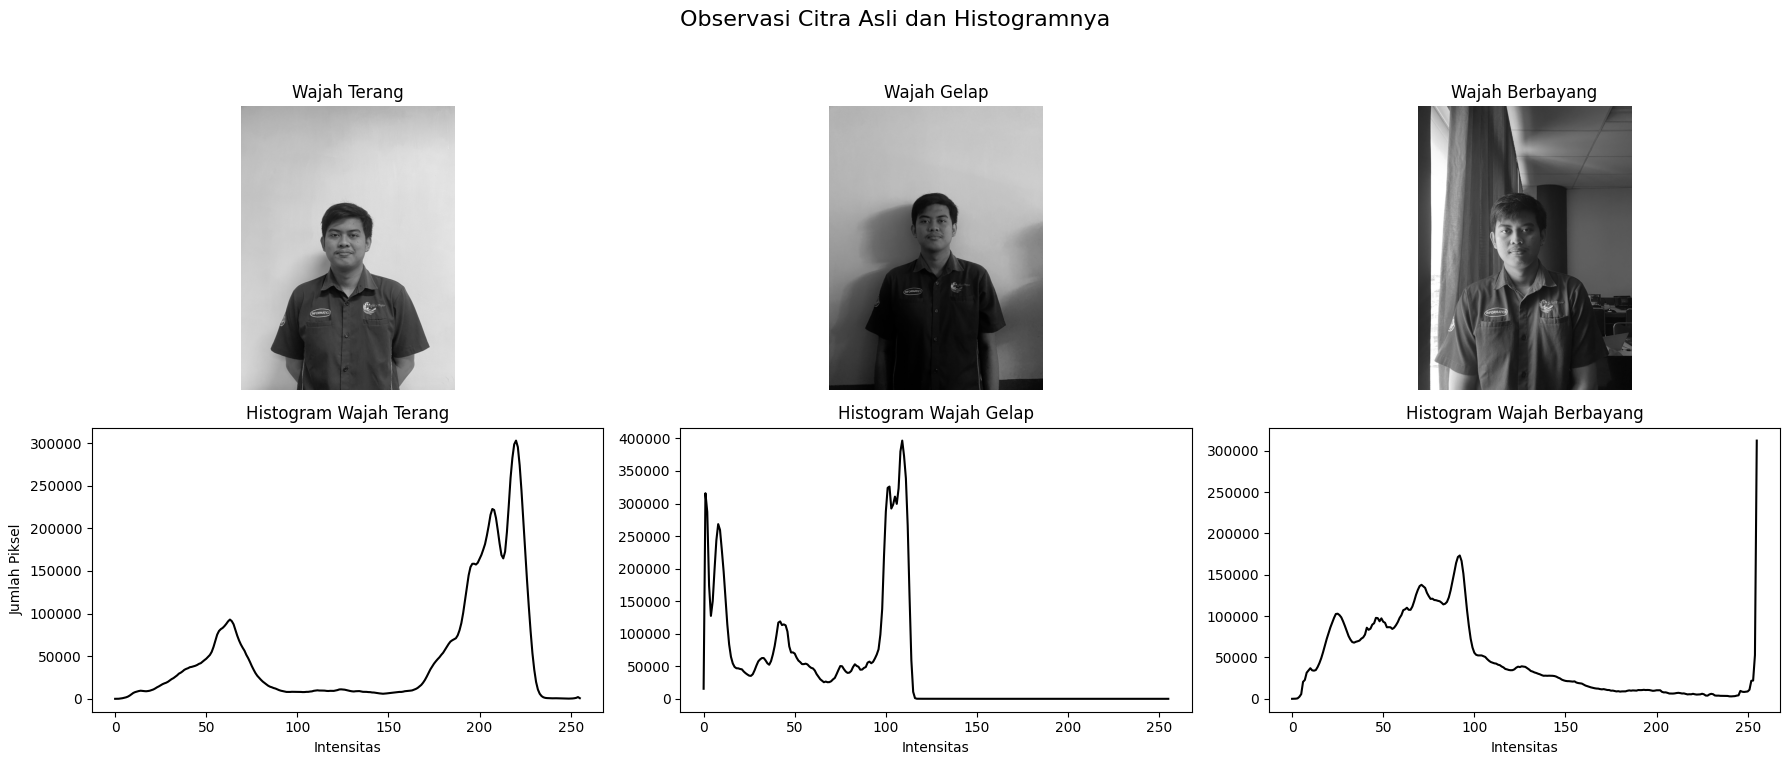

In [10]:
# Menghitung histogram untuk setiap citra
hist_terang = cv2.calcHist([gray_terang], [0], None, [256], [0, 256])
hist_gelap = cv2.calcHist([gray_gelap], [0], None, [256], [0, 256])
hist_bayangan = cv2.calcHist([gray_bayangan], [0], None, [256], [0, 256])

# Menyiapkan plot
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle('Observasi Citra Asli dan Histogramnya', fontsize=16)

# Citra Terang
axes[0, 0].imshow(gray_terang, cmap='gray')
axes[0, 0].set_title('Wajah Terang')
axes[0, 0].axis('off')
axes[1, 0].plot(hist_terang, color='black')
axes[1, 0].set_title('Histogram Wajah Terang')
axes[1, 0].set_xlabel('Intensitas')
axes[1, 0].set_ylabel('Jumlah Piksel')

# Citra Gelap
axes[0, 1].imshow(gray_gelap, cmap='gray')
axes[0, 1].set_title('Wajah Gelap')
axes[0, 1].axis('off')
axes[1, 1].plot(hist_gelap, color='black')
axes[1, 1].set_title('Histogram Wajah Gelap')
axes[1, 1].set_xlabel('Intensitas')

# Citra Berbayang
axes[0, 2].imshow(gray_bayangan, cmap='gray')
axes[0, 2].set_title('Wajah Berbayang')
axes[0, 2].axis('off')
axes[1, 2].plot(hist_bayangan, color='black')
axes[1, 2].set_title('Histogram Wajah Berbayang')
axes[1, 2].set_xlabel('Intensitas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2. Terapkan transformasi brightness dan contrast (linear/log brightness).
- Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar wajah tampak
natural.

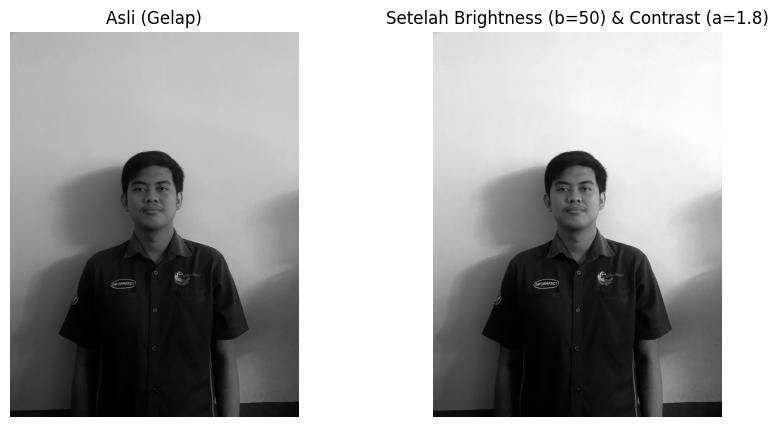

In [11]:
# Tentukan nilai a (kontras) dan b (kecerahan)
# Nilai ini adalah hasil eksperimen agar terlihat natural
a = 1.8  # Kontras (lebih dari 1 untuk meningkatkan)
b = 50   # Kecerahan (nilai positif untuk mencerahkan)

# Terapkan transformasi
img_bc = cv2.convertScaleAbs(gray_gelap, alpha=a, beta=b)

# Tampilkan perbandingan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_gelap, cmap='gray')
plt.title('Asli (Gelap)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_bc, cmap='gray')
plt.title(f'Setelah Brightness (b={b}) & Contrast (a={a})')
plt.axis('off')
plt.show()

## 3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.
- Bandingkan hasil visual dan histogram sebelum–sesudah.


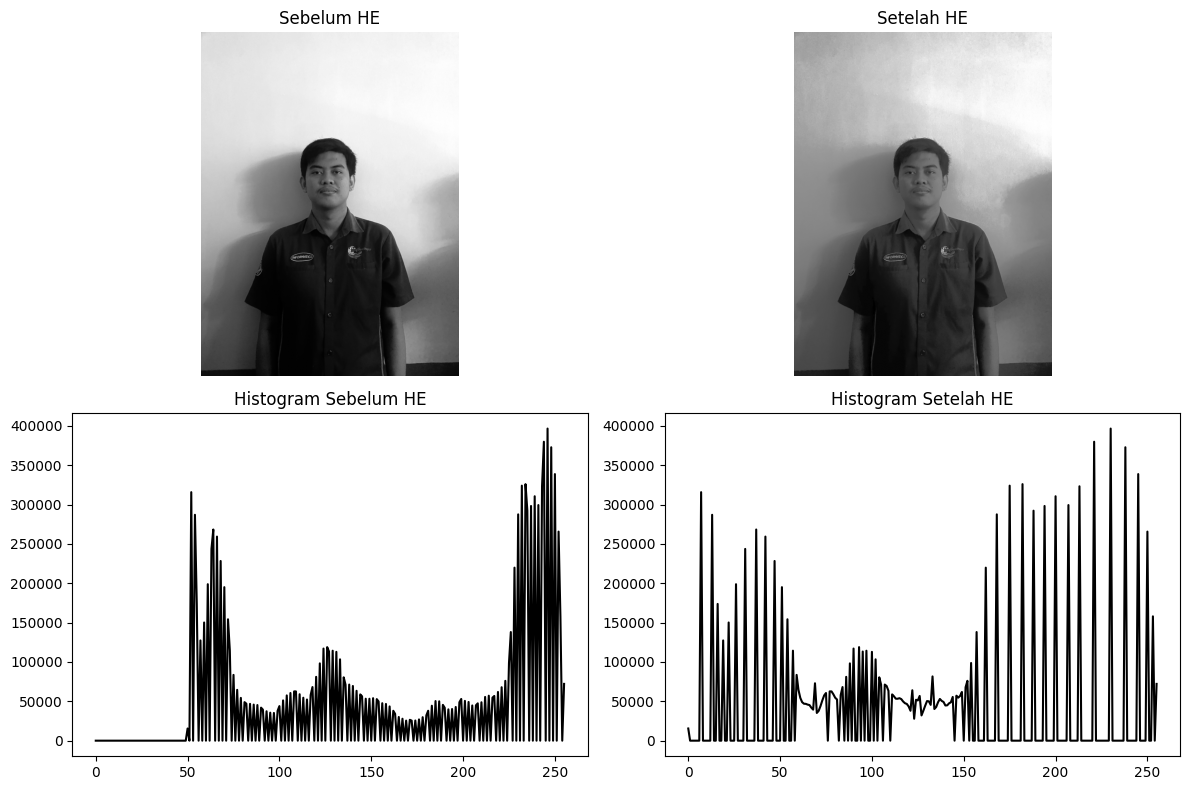

In [12]:
# Terapkan HE
img_he = cv2.equalizeHist(img_bc)

# Hitung histogram sebelum dan sesudah HE
hist_bc = cv2.calcHist([img_bc], [0], None, [256], [0, 256])
hist_he = cv2.calcHist([img_he], [0], None, [256], [0, 256])

# Tampilkan perbandingan visual dan histogram [cite: 27]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(img_bc, cmap='gray')
axes[0, 0].set_title('Sebelum HE')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_he, cmap='gray')
axes[0, 1].set_title('Setelah HE')
axes[0, 1].axis('off')

axes[1, 0].plot(hist_bc, color='black')
axes[1, 0].set_title('Histogram Sebelum HE')

axes[1, 1].plot(hist_he, color='black')
axes[1, 1].set_title('Histogram Setelah HE')

plt.tight_layout()
plt.show()

## 4. Terapkan filter spasial:
- Low-pass filter untuk menghaluskan noise kulit wajah.
- High-pass atau Laplacian filter untuk menajamkan tepi mata dan bibir.

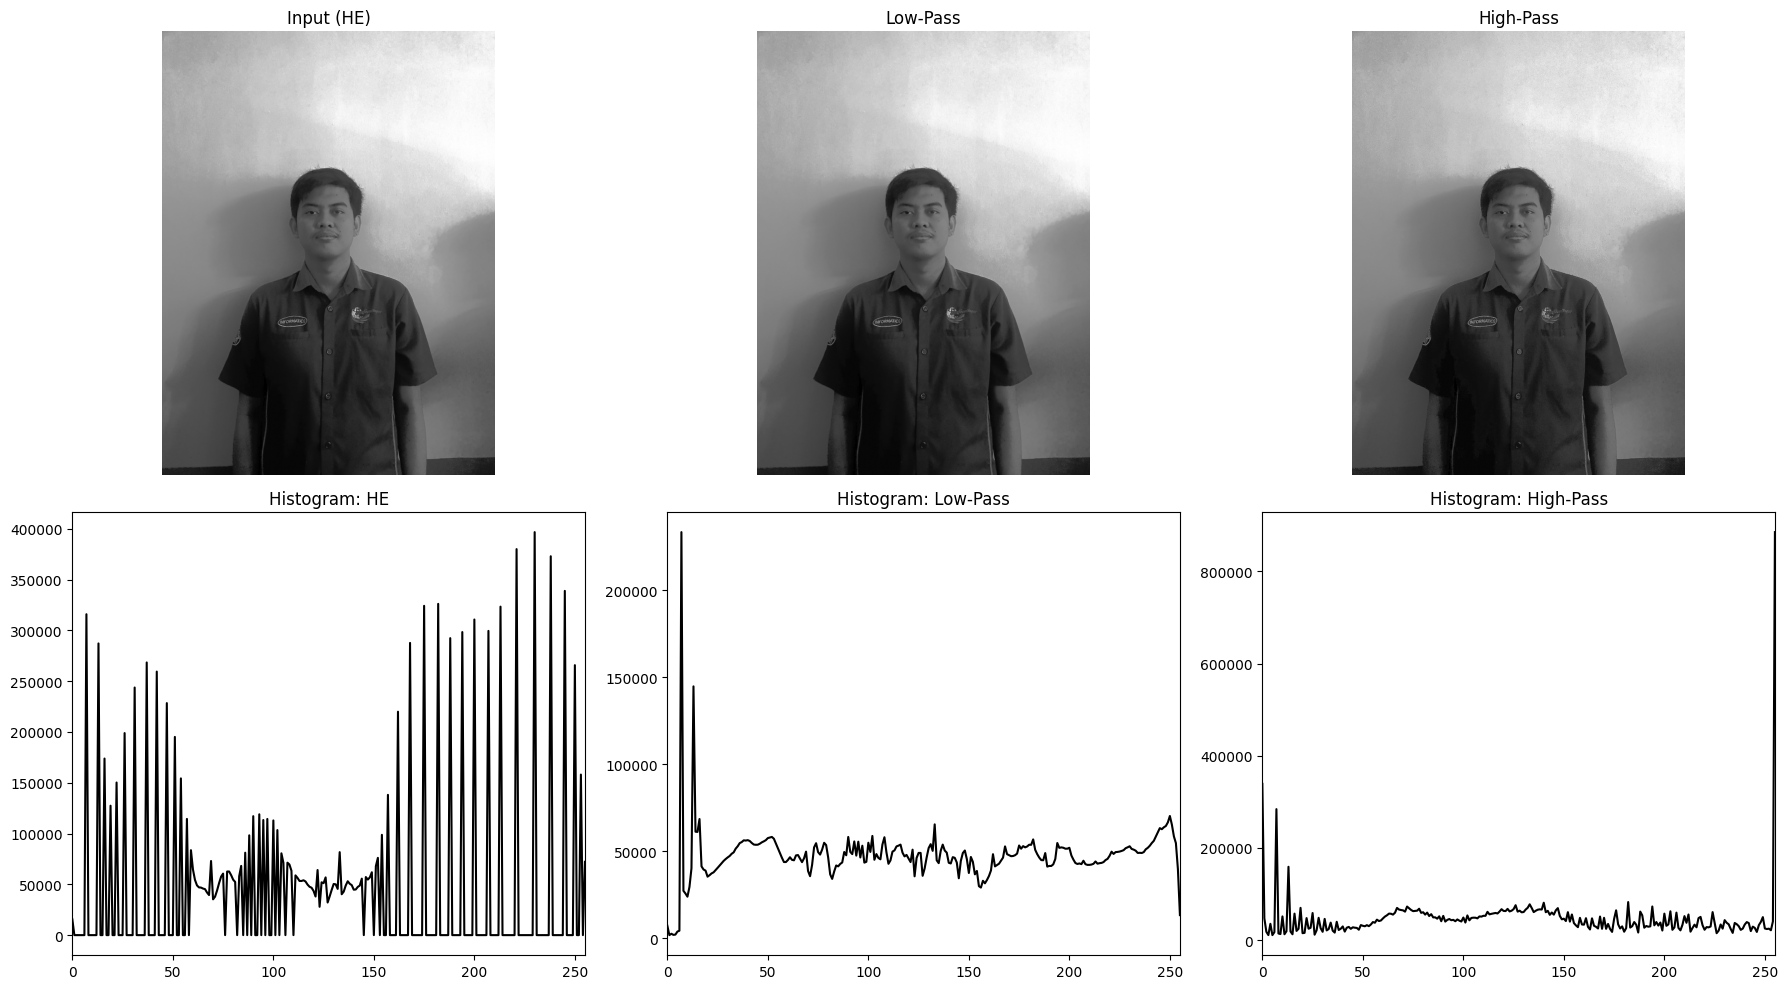

In [13]:
# Low-pass filter untuk menghaluskan noise kulit wajah [cite: 30]
# Kita gunakan GaussianBlur yang lebih halus daripada blur biasa
img_lowpass = cv2.GaussianBlur(img_he, (5, 5), 0)

# High-pass (Laplacian) filter untuk menajamkan tepi [cite: 32]
# Kernel ini menajamkan gambar
kernel_sharpen = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])
img_highpass = cv2.filter2D(img_he, -1, kernel_sharpen)

# Hitung histogram 256 bin dengan OpenCV
hist_he  = cv2.calcHist([img_he], [0], None, [256], [0, 256]).ravel()
hist_lp  = cv2.calcHist([img_lowpass], [0], None, [256], [0, 256]).ravel()
hist_hp  = cv2.calcHist([img_highpass], [0], None, [256], [0, 256]).ravel()

# Plot gambar dan histogram
plt.figure(figsize=(18, 10))

# Baris 1: gambar
plt.subplot(2, 3, 1)
plt.imshow(img_he, cmap='gray', vmin=0, vmax=255)
plt.title('Input (HE)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_lowpass, cmap='gray', vmin=0, vmax=255)
plt.title('Low-Pass')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_highpass, cmap='gray', vmin=0, vmax=255)
plt.title('High-Pass')
plt.axis('off')

# Baris 2: histogram (kurva)
plt.subplot(2, 3, 4)
plt.plot(hist_he, color='black')
plt.title('Histogram: HE')
plt.xlim(0, 255)

plt.subplot(2, 3, 5)
plt.plot(hist_lp, color='black')
plt.title('Histogram: Low-Pass')
plt.xlim(0, 255)

plt.subplot(2, 3, 6)
plt.plot(hist_hp, color='black')
plt.title('Histogram: High-Pass')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

## 5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warnawajah (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap detail dan ekspresi wajah.


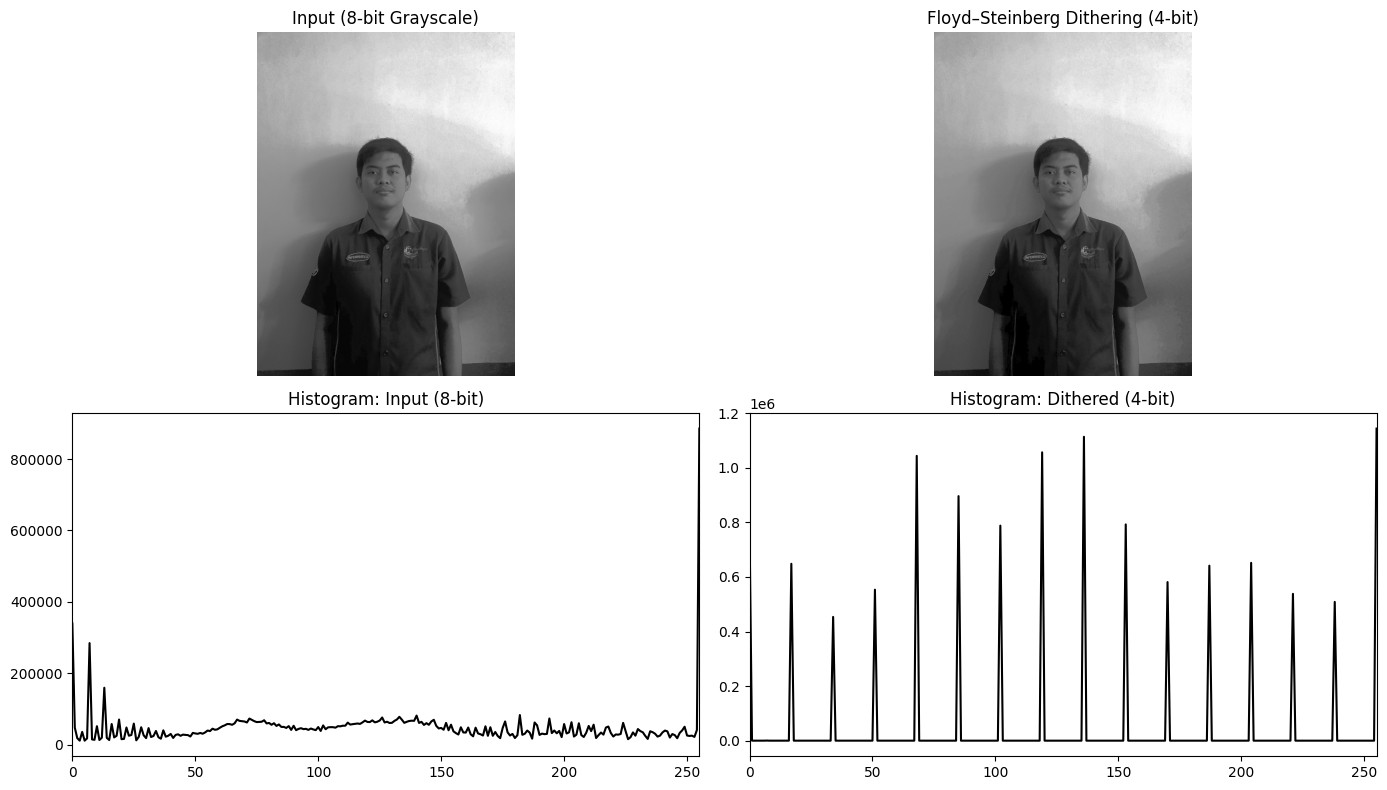

In [14]:
def get_new_val(old_val, nc):
    return np.round(old_val * (nc - 1)) / (nc - 1)

def fs_dither_cv2_fast(img, nc=16):
    """
    Floyd–Steinberg dithering versi cepat (NumPy vectorized).
    """
    arr = img.astype(np.float32) / 255.0

    # Pastikan array memiliki channel (H, W, C)
    if len(arr.shape) == 2:
        arr = np.expand_dims(arr, axis=2)

    h, w, c = arr.shape

    for y in range(h - 1):  # cukup sampai h-2
        # Kuantisasi satu baris sekaligus
        old_row = arr[y, :, :]
        new_row = get_new_val(old_row, nc)
        arr[y, :, :] = new_row
        err_row = old_row - new_row

        # Sebarkan error dengan slicing NumPy
        arr[y, 1:, :] += err_row[:-1, :] * 7 / 16
        arr[y + 1, :-1, :] += err_row[1:, :] * 3 / 16
        arr[y + 1, :, :] += err_row * 5 / 16
        arr[y + 1, 1:, :] += err_row[:-1, :] * 1 / 16

    arr = np.clip(arr, 0, 1)
    result = (arr * 255).astype(np.uint8)

    if result.shape[2] == 1:
        result = result[:, :, 0]
    return result


img_dithered = fs_dither_cv2_fast(img_highpass, nc=16)

hist_ori = cv2.calcHist([img_highpass], [0], None, [256], [0, 256]).ravel()
hist_dth = cv2.calcHist([img_dithered],   [0], None, [256], [0, 256]).ravel()

# Plot gambar dan histogram
plt.figure(figsize=(14, 8))

# Baris 1: Gambar asli dan hasil dithering
plt.subplot(2, 2, 1)
plt.imshow(img_highpass, cmap='gray', vmin=0, vmax=255)
plt.title('Input (8-bit Grayscale)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_dithered, cmap='gray', vmin=0, vmax=255)
plt.title('Floyd–Steinberg Dithering (4-bit)')
plt.axis('off')

# Baris 2: Histogram (kurva)
plt.subplot(2, 2, 3)
plt.plot(hist_ori, color='black')
plt.title('Histogram: Input (8-bit)')
plt.xlim(0, 255)

plt.subplot(2, 2, 4)
plt.plot(hist_dth, color='black')
plt.title('Histogram: Dithered (4-bit)')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

# Bagian D

## Urutan proses terbaik untuk menghasilkan wajah paling siap recognition
BC -> HE -> Highpass -> Dithered

## Perbandingan nilai PSNR antara citra asli yang memiliki pencahanyaan baik dan hasil prapemrosesan

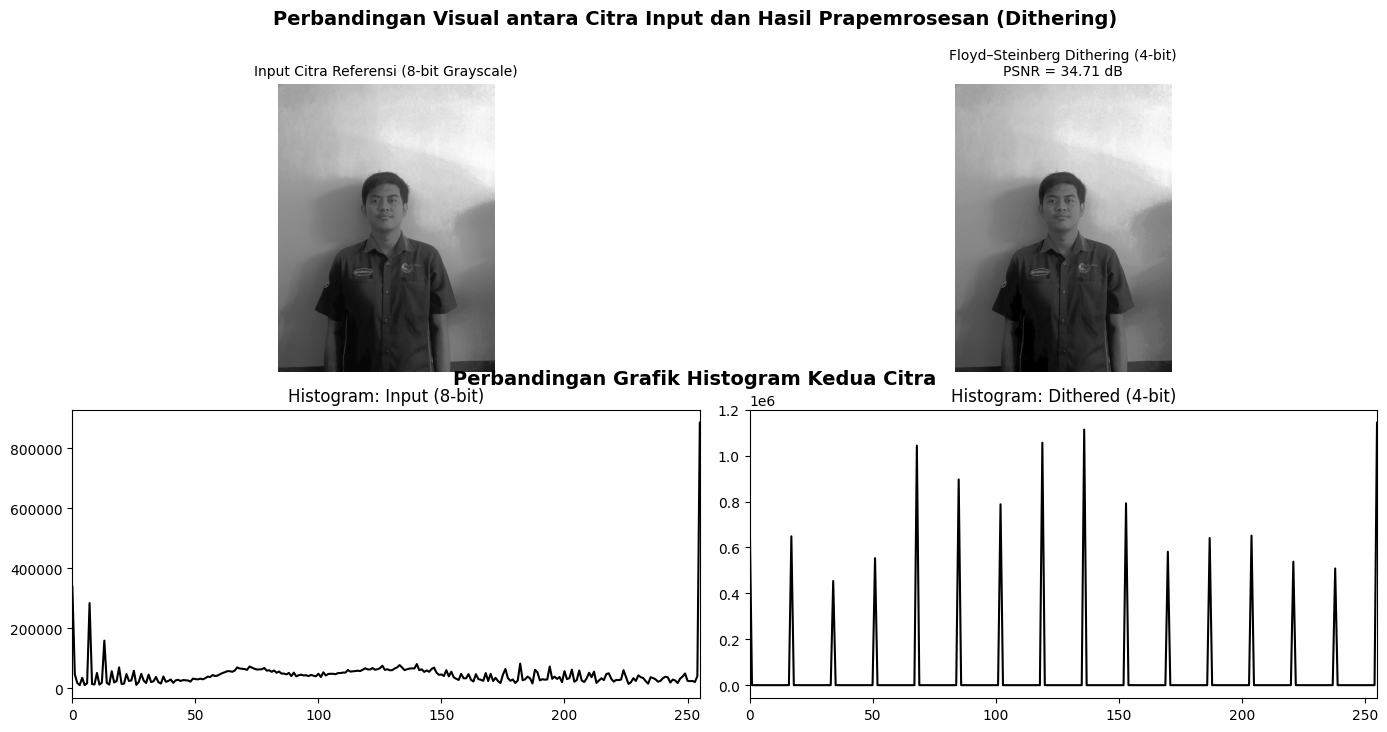


--- Interpretasi Hasil Analisis Kualitas Dithering ---
Metode Prapemrosesan: Dithering Floyd–Steinberg
Citra Referensi: gray_gelap (8-bit Grayscale)
Level Kuantisasi (nc): 16 level, setara dengan 4-bit per piksel.

[1] Analisis Kualitas dengan PSNR
Nilai PSNR (Peak Signal-to-Noise Ratio): 34.71 dB
   - PSNR berada dalam kisaran sedang (30-40 dB). Proses dithering dianggap telah menghasilkan KUALITAS VISUAL yang masih dapat diterima, namun dengan perubahan piksel yang terukur.
   - Nilai ini mencerminkan kompromi antara reduksi kedalaman warna dan persepsi visual (dithering menambahkan noise kecil untuk menipu mata).

[2] Analisis Distribusi dengan Histogram
   - **Histogram Input (8-bit):** Menunjukkan distribusi nilai intensitas yang halus dan kontinu (256 level berbeda).
   - **Histogram Dithered (4-bit):** Menunjukkan distribusi yang SPARS (terkonsentrasi) pada HANYA 16 Puncak atau level intensitas.
   - **Kesimpulan Histogram:** Perubahan dari kurva halus menjadi deretan puncak ta

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import log10, sqrt

# Asumsi img_highpass sudah didefinisikan sebelumnya dan bertipe numpy array (uint8 grayscale)
# Contoh placeholder (ganti dengan gambar asli Anda)
# img_highpass = np.random.randint(0, 256, size=(100, 100), dtype=np.uint8)

def calculate_psnr(gray_gelap,img_dithered, max_pixel=255.0):
    """
    Menghitung Peak Signal-to-Noise Ratio (PSNR) antara dua gambar.
    Asumsi kedua gambar adalah np.uint8.
    """
    # Pastikan kedua gambar bertipe float32 untuk perhitungan
    img1_float = gray_gelap.astype(np.float32)
    img2_float = img_dithered.astype(np.float32)

    # Hitung Mean Squared Error (MSE)
    mse = np.mean((img1_float - img2_float) ** 2)

    # Jika MSE = 0, gambar identik dan PSNR adalah tak hingga (diberi nilai sangat tinggi)
    if mse == 0:
        return 100.0 # Nilai 100 dB dianggap "sempurna" untuk gambar 8-bit

    # Hitung PSNR dalam dB
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Hitung PSNR
psnr_value = calculate_psnr(img_highpass, img_dithered)

# Hitung Histogram
hist_ori = cv2.calcHist([img_highpass], [0], None, [256], [0, 256]).ravel()
hist_dth = cv2.calcHist([img_dithered], [0], None, [256], [0, 256]).ravel()

# --- Plot Gambar dan Histogram ---
plt.figure(figsize=(14, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.1) # Tambahkan ruang vertikal

# --- MENAMBAHKAN JUDUL BARIS 1 (CITRA) ---
plt.figtext(0.5, 0.96,
            'Perbandingan Visual antara Citra Input dan Hasil Prapemrosesan (Dithering)',
            ha='center', va='top', fontsize=14, fontweight='bold')

# Baris 1: Gambar asli dan hasil dithering
plt.subplot(2, 2, 1)
plt.imshow(img_highpass, cmap='gray', vmin=0, vmax=255)
plt.title(f'Input Citra Referensi (8-bit Grayscale)', fontsize=10)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_dithered, cmap='gray', vmin=0, vmax=255)
plt.title(f'Floyd–Steinberg Dithering ({int(np.log2(nc_val))}-bit)\nPSNR = {psnr_value:.2f} dB', fontsize=10)
plt.axis('off')

# --- MENAMBAHKAN JUDUL BARIS 2 (HISTOGRAM) ---
# Koordinat y=0.51 adalah perkiraan posisi yang baik antara baris 1 dan baris 2
plt.figtext(0.5, 0.51,
            'Perbandingan Grafik Histogram Kedua Citra',
            ha='center', va='top', fontsize=14, fontweight='bold')

# Baris 2: Histogram (kurva)
plt.subplot(2, 2, 3)
plt.plot(hist_ori, color='black')
plt.title('Histogram: Input (8-bit)')
plt.xlim(0, 255)

plt.subplot(2, 2, 4)
plt.plot(hist_dth, color='black')
plt.title(f'Histogram: Dithered ({int(np.log2(nc_val))}-bit)')
plt.xlim(0, 255)

plt.tight_layout(rect=[0, 0.05, 1, 0.93]) # Sesuaikan rect untuk memberi ruang pada figtext
plt.show() # Uncomment untuk menampilkan

# --- Interpretasi ---

print(f"\n--- Interpretasi Hasil Analisis Kualitas Dithering ---")
print(f"Metode Prapemrosesan: Dithering Floyd–Steinberg")
print(f"Citra Referensi: gray_gelap (8-bit Grayscale)")
print(f"Level Kuantisasi (nc): {nc_val} level, setara dengan {int(np.log2(nc_val))}-bit per piksel.")

print(f"\n[1] Analisis Kualitas dengan PSNR")
print(f"Nilai PSNR (Peak Signal-to-Noise Ratio): {psnr_value:.2f} dB")

if psnr_value < 30:
    print(f"   - PSNR relatif rendah (dibawah 30 dB), menunjukkan bahwa proses dithering telah menyebabkan DEGRADASI KUALITAS PIKSEL yang signifikan pada citra.")
    print(f"   - Hal ini wajar, karena dithering adalah bentuk kuantisasi yang sengaja mengubah nilai piksel 8-bit menjadi lebih sedikit bit ({int(np.log2(nc_val))}-bit), sehingga nilai MSE meningkat drastis.")
elif 30 <= psnr_value < 40:
    print(f"   - PSNR berada dalam kisaran sedang (30-40 dB). Proses dithering dianggap telah menghasilkan KUALITAS VISUAL yang masih dapat diterima, namun dengan perubahan piksel yang terukur.")
    print(f"   - Nilai ini mencerminkan kompromi antara reduksi kedalaman warna dan persepsi visual (dithering menambahkan noise kecil untuk menipu mata).")
else: # psnr_value >= 40 atau sangat tinggi
    print(f"   - PSNR sangat tinggi ({psnr_value:.2f} dB). Ini TIDAK UMUM untuk proses kuantisasi dan dithering yang agresif.")
    print(f"   - Jika nilai ini muncul, proses kuantisasi mungkin hanya mengurangi sedikit level warna, atau citra referensi dan citra dithered sudah hampir identik.")

print(f"\n[2] Analisis Distribusi dengan Histogram")
print(f"   - **Histogram Input (8-bit):** Menunjukkan distribusi nilai intensitas yang halus dan kontinu (256 level berbeda).")
print(f"   - **Histogram Dithered ({int(np.log2(nc_val))}-bit):** Menunjukkan distribusi yang SPARS (terkonsentrasi) pada HANYA {nc_val} Puncak atau level intensitas.")
print(f"   - **Kesimpulan Histogram:** Perubahan dari kurva halus menjadi deretan puncak tajam mengkonfirmasi bahwa proses kuantisasi telah berhasil MENGURANGI KEDALAMAN WARNA citra.")

##  Rekomendasi metode peningkatan kualitas wajah untuk sistem pengenalan wajah real-time